In [1]:
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
import networkx as nx
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

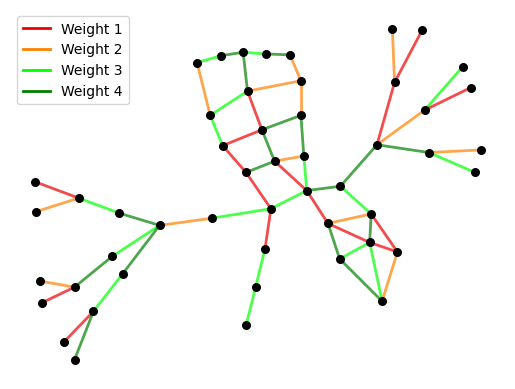

In [2]:
weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
G = nx.Graph()
for endpoints, weight in weight.items():
    G.add_edge(endpoints[0], endpoints[1], weight=weight)

# shift_weight =  {1: 4, 2: 3, 3: 2, 4: 1}
# for endpoint1, endpoint2, data in G.edges(data=True):
#     data['weight'] = shift_weight[data['weight']]
colors =  {1: '#EE0000', 2: '#FF8000', 3: '#00FF00', 4: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30)
for u, v, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=colors[data['weight']], width=2, alpha=0.7)

# Add a legend for the edge colors
handles = [plt.Line2D([], [], color=colors[weight], lw=2) for weight in colors]
labels = [f"Weight {weight}" for weight in colors]
plt.legend(handles, labels)

# Show the plot
# plt.show()

# plt.legend(loc='upper left')
plt.axis('off')
plt.savefig('./Images/academic_example.png', dpi=800)
plt.show()

In [3]:
def create_second_graph(G):
    # Create a new graph with the same nodes as G
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())

    # Add edges to G2 with key=1 and weight=weight/key
    for endpoint1, endpoint2, data in G.edges(data=True):
        weight = data['weight']
        G2.add_edge(endpoint1, endpoint2, weight=4)

    return G2
G2 = create_second_graph(G)

In [7]:
def compute_diameter_ratio(G, G2):
    # Create a new graph H with the largest connected component of the subgraph G where all the edges have weight greater or equal to 3
    H = nx.Graph()
    for u, v, d in G.edges(data='weight'):
        if weight >= 3:
            H.add_edge(u, v, weight=d['weight'])

    # Get the largest connected component of H
    largest_cc = max(nx.connected_components(H), key=len)

    # Compute the diameter of the largest connected component of H
    diameter_H = nx.diameter(H.subgraph(largest_cc))

    # Compute the diameter of the largest connected component of G2
    largest_cc_G2 = max(nx.connected_components(G2), key=len)
    diameter_G2 = nx.diameter(G2.subgraph(largest_cc_G2))

    # Compute the ratio of the diameter of H to the diameter of G2
    if diameter_G2 != 0:
        ratio = diameter_H / diameter_G2
    else:
        ratio = 0

    return ratio
compute_diameter_ratio(G, G2)

TypeError: 'int' object is not subscriptable

{'p', 'b2', 'f1', 'q', 'p1', 'k1', 'o', 'l1', 'a2', 'u', 't', 'o1', 'n', 'w1', 'm1', 'r', 'j1'}
{'c1', 'b2', 'p1', 'l1', 's1', 'z', 'b', 'k', 'f', 'o1', 'w1', 'm1', 'r', 'w', 'a', 'a1', 'g1', 'i', 'n1', 'c', 'a2', 'i1', 'b1', 'd1', 'f1', 'm', 'o', 'h1', 'q1', 'z1', 'n', 'u1', 'p', 'e', 's', 'q', 't1', 'k1', 'j', 'v1', 'h', 'v', 'd', 'l', 'u', 't', 'e1', 'r1', 'g', 'j1'}


C:\Users\camperom\AppData\Local\Temp\ipykernel_17096\2914985339.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
C:\Users\camperom\AppData\Local\Temp\ipykernel_17096\2914985339.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


0.4426229508196721


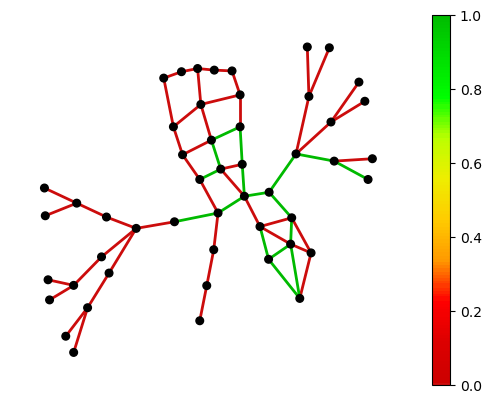

In [ ]:
def plot_largest_cc(G, G2):
    # Create a new graph H with the largest connected component of the subgraph G where all the edges have weight greater or equal to 3
    H = nx.Graph()
    for u, v, weight in G.edges(data='weight'):
        if weight >= 3:
            H.add_edge(u, v, weight=weight['weight'])

    # Get the largest connected component of H
    largest_cc = max(nx.connected_components(H), key=len)
    W = H.subgraph(largest_cc)
    print(largest_cc)
    # Get the largest connected component of G2
    largest_cc_G2 = max(nx.connected_components(G2), key=len)
    print(largest_cc_G2)
    W1 = G2.subgraph(largest_cc_G2)
    # Create a color map for the edges
    ratio = []
    W_edges = W.edges()
    for u, v in G.edges():
        if ((u,v) in W_edges or (v, u) in W_edges):
            ratio.append(1)
        else:
            ratio.append(0)
    # s1 = [(u, v) for (u, v, d) in G.edges(data=True) if ((u,v) in color_ed or (v, u) in color_ed)]
    # s2 = [(u, v) for (u, v, d) in G.edges(data=True) if ((u,v) not in color_ed and (v,u) not in color_ed)]
    node_color_map = ['black'] * len(G.nodes())
    nx.draw_networkx_nodes(G, pos, node_color=node_color_map, node_size=30)
    edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
    sm = ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=min(ratio), vmax=max(ratio)))
    sm.set_array([])
    nx.draw_networkx_edges(G, pos, edge_color=ratio, edge_cmap=edge_color_map, width=2)
    plt.colorbar(sm)

    # Show the plot
    plt.axis('off')
    plt.savefig('./Images/ae_diameter.png', dpi=800)
    print((len(W.nodes()) + sum(d['weight'] for u, v, d in W.edges(data=True)))/(len(W1.nodes()) + sum(d['weight'] for u, v, d in w1.edges(data=True))))
    plt.show()
plot_largest_cc(G, G2)

C:\Users\camperom\AppData\Local\Temp\ipykernel_17096\1342037211.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('nipy_spectral_r', 256)  # create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)


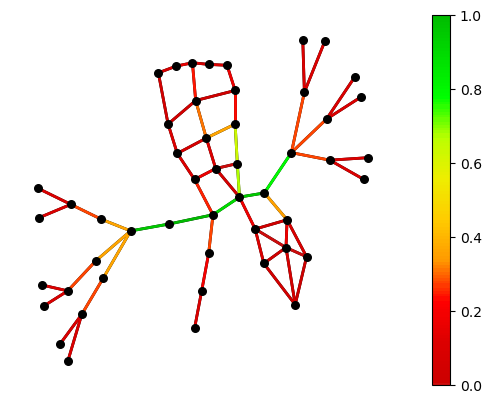

In [ ]:
from __future__ import division
import geopandas
import scipy.io
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import os
import numpy as np
from itertools import combinations
from scipy.sparse import csr_matrix
from scipy import linalg
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

clear = lambda: os.system('cls')
clear()


#- b: blue
#- g: green
#- r: red
#- c: cyan
#- m: magenta
#- y: yellow
#- k: black
#- w: white
#-------------------------------------------------------------------------------------------------------------------------------------------------------------
#Function Filtration
def inverse_weight(weight):
    '''
    ----------
     Parameters
     ----------
     dw: dictionary
         links as the keys and weights as the values

     --------
     Returns:
     --------
     G: networkx weighted graph.
     dw: dictionary
         Keys are the edges and the values is safety road classification of the corresponding edge.

    '''
    G = nx.Graph()
    m = max(list(weight.values()))
    for i in list(weight.keys()):
        if (weight[i] != 0):
            G.add_edge(i[0], i[1], weight = m+1-weight[i])
    #nx.draw_networkx(G, with_labels=False, node_size=7)
    #plt.show()
    return G

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
def current_graph(weight):
    '''
    ----------
     Parameters
     ----------
     dw: dictionary
         links as the keys and weights as the values

     --------
     Returns:
     --------
     G: networkx weighted graph.
     dw: dictionary
         Keys are the edges and the values is safety road classification of the corresponding edge.

    '''
    G = nx.Graph()
    for i in list(weight.keys()):
        if (weight[i] != 0):
            G.add_edge(i[0], i[1], weight = weight[i])
    return G


#-------------------------------------------------------------------------------------------------------------------------------------------------------------
def plot_edge_betweenness_centrality(G, IG, pos):
    bca = nx.edge_betweenness_centrality(IG, k=None, normalized=True, weight='weight', seed=None)
    bc = {}
    max_bca = max(list(bca.values()))
    min_bca = min(list(bca.values()))
    for i in list(bca.keys()):
        bc[i] = (bca[i]-min_bca)/(max_bca-min_bca)
    # plt.figure(figsize=(12, 8))
    nx.draw_networkx_edges(G, pos, width=2, edge_color="k")
    # node labels
    # nx.draw_networkx_edge_labels(G, pos, font_size=1, font_family="sans-serif", alpha=0.7)
    # edge_labels = nx.get_edge_attributes(Gw, 'weight')
    # nx.draw_networkx_edge_labels(Gw, pos, edge_labels=edge_labels, font_size=7, font_family="sans-serif", alpha=1)
    hsv_modified = cm.get_cmap('nipy_spectral_r', 256)  # create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
    newcmp = ListedColormap(hsv_modified(np.linspace(0.05, 0.50, 256)))  # show figure
    cmap = newcmp
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=G.nodes(),
        node_size=30,
        node_color="k"
        # cmap=plt.cm.Blues,
        # cmap=plt.cm.Reds_r,
        #cmap=cmap,
    )
    edges = nx.draw_networkx_edges(G, pos, edge_color=list(bc.values()), width=2,
                                   edge_cmap=cmap)
    plt.colorbar(edges)
    plt.xlim(-5.7, 3.8)
    plt.ylim(-1.8, 3.9)
    plt.axis("off")
    # ax = plt.gca()
    # ax.set_title(sum(list(cc.values())))
    # plt.savefig('ae_edge_betweenness.eps', format='eps')
    # plt.savefig('ae_edge_betweenness.pdf', format='pdf', dpi = 1200)
    plt.savefig('./Images/ae_betweenness.png', dpi=800)
    plt.show()
    #plt.show()
    #pc = mpl.collections.PatchCollection(edges, cmap=cmap)
    #pc.set_array(bc)

    #ax = plt.gca()
    #ax.set_axis_off()
    #plt.colorbar(pc, ax=ax)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------



# -------------------------------------------------------------------------------------------------------------------------------------------------------------
# v_weights =  {
# ('a','b'): 1/2,
# ('b','c'): 1/2,
# ('b','g'): 1/3,
# ('b','f'): 1/2,
# ('b','e'): 1/3,
# ('b','h'): 1,
# ('g','c'): 1/4,
# ('f','c'): 1/2,
# ('e','c'): 1/3,
# ('h','c'): 1,
# ('c','d'): 1
# }
# pos_n = {
# 'a': np.array([0,0]),
# 'b': np.array([1,0]),
# 'c': np.array([3,0]),
# 'd': np.array([4,0]),
# 'e': np.array([2,-0.25]),
# 'f': np.array([2,0.25]),
# 'g': np.array([2,0.5]),
# 'h': np.array([2,-0.5]),
# }
# weight_inv =  {
# ('a','c'): 1,
# ('b','c'): 4,
# ('c','d'): 3,
# ('d','e'): 2,
# ('f','h'): 1,
# ('g','h'): 5,
# ('h','i'): 2,
# ('i','e'): 1,
# ('j','l'): 5,
# ('k','l'): 2,
# ('l','m'): 3,
# ('m','e'): 1,
# ('e','n'): 4,
# ('n','o'): 3,
# ('o','p'): 1,
# ('p','q'): 2,
# ('q','r'): 3,
# ('q','k1'): 4,
# ('q','t'): 4,
# ('p','s'): 5,
# ('s','v'): 3,
# ('v','e1'): 1,
# ('e1','d1'): 1,
# ('d1','c1'): 2,
# ('c1','b1'): 3,
# ('b1','a1'): 1,
# ('o','k1'): 3,
# ('k1','q'): 5,
# ('k1','r'): 3,
# ('q','r'): 4,
# ('q','t'): 2,
# ('t','w'): 5,
# ('w','c1'): 2,
# ('v','w'): 3,
# ('t','s'): 1,
# ('r','u'): 2,
# ('u','z'): 1,
# ('z','a1'): 4,
# ('w','z'): 4,
# ('u','t'): 2,
# ('o','g1'): 5,
# ('g1','h1'): 1,
# ('h1','i1'): 3,
# ('k1','f1'): 1,
# ('f1','l1'): 3,
# ('l1','n1'): 5,
# ('n1','o1'): 4,
# ('k1','j1'): 1,
# ('j1','m1'): 2,
# ('m1','o1'): 1,
# ('j1','l1'): 4,
# ('j1','b2'): 5,
# ('l1','b2'): 2,
# ('m1','b2'): 3,
# ('b2','o1'): 1,
# ('b2','n1'): 5,
# ('f1','p1'): 2,
# ('p1','q1'): 1,
# ('q1','r1'): 4,
# ('q1','s1'): 5,
# ('p1','t1'): 4,
# ('t1','u1'): 3,
# ('t1','v1'): 5,
# ('p1','w1'): 2,
# ('w1','z1'): 1,
# ('w1','a2'): 3,
# }

weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}



pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}
#print(dw)
# weight_inv = inverse_weight(dw)
G = current_graph(weight)
IG = inverse_weight(weight)

plot_edge_betweenness_centrality(G, IG, pos)
